In [828]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Load the CSV file
df = pd.read_csv("synthetic_ticket_purchases.csv")

# Show the first few rows
print(df.head())


  user_id  event_id tier_id          purchase_timestamp  purchase_amount  \
0  user_1  event_20  tier_3  2025-06-24 03:53:37.616459            100.0   
1  user_1  event_19  tier_2  2025-06-24 04:19:37.616459             75.0   
2  user_1  event_10  tier_4  2025-06-24 07:01:37.616459            150.0   
3  user_1   event_3  tier_4  2025-06-27 17:41:37.616459            150.0   
4  user_1  event_11  tier_2  2025-06-29 11:54:37.616459             75.0   

   tickets_quantity payment_card_id      ip_address  purchase_success  \
0                 3      4cfbbf9dc6  192.168.253.58             False   
1                 2      9eb9b0203e  172.27.157.219              True   
2                 1      dda0c15e02   172.21.92.207              True   
3                 3      916f6b5154   192.168.1.100             False   
4                 3      b5e600dcd8   172.23.169.21              True   

            location  time_since_last_purchase  failed_attempts_count  
0       Robbinsmouth            

In [830]:
# Check datatypes of all columns
print(df.dtypes)

# Optional: show summary info
print("\n--- Summary Info ---")
df.info()


user_id                      object
event_id                     object
tier_id                      object
purchase_timestamp           object
purchase_amount             float64
tickets_quantity              int64
payment_card_id              object
ip_address                   object
purchase_success               bool
location                     object
time_since_last_purchase    float64
failed_attempts_count         int64
dtype: object

--- Summary Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1000 non-null   object 
 1   event_id                  1000 non-null   object 
 2   tier_id                   1000 non-null   object 
 3   purchase_timestamp        1000 non-null   object 
 4   purchase_amount           1000 non-null   float64
 5   tickets_quantity          1000 non-n

In [832]:
df.columns

Index(['user_id', 'event_id', 'tier_id', 'purchase_timestamp',
       'purchase_amount', 'tickets_quantity', 'payment_card_id', 'ip_address',
       'purchase_success', 'location', 'time_since_last_purchase',
       'failed_attempts_count'],
      dtype='object')

In [834]:
df.head()

,user_id,event_id,tier_id,purchase_timestamp,purchase_amount,tickets_quantity,payment_card_id,ip_address,purchase_success,location,time_since_last_purchase,failed_attempts_count
0,user_1,event_20,tier_3,2025-06-24 03:53:37.616459,100.0,3,4cfbbf9dc6,192.168.253.58,False,Robbinsmouth,-12371.0,1
1,user_1,event_19,tier_2,2025-06-24 04:19:37.616459,75.0,2,9eb9b0203e,172.27.157.219,True,Port Patriciaside,NaN,0
2,user_1,event_10,tier_4,2025-06-24 07:01:37.616459,150.0,1,dda0c15e02,172.21.92.207,True,Jenniferfurt,-4960.0,2
3,user_1,event_3,tier_4,2025-06-27 17:41:37.616459,150.0,3,916f6b5154,192.168.1.100,False,Port Jade,-5442.0,2
4,user_1,event_11,tier_2,2025-06-29 11:54:37.616459,75.0,3,b5e600dcd8,172.23.169.21,True,East Charlesmouth,-12688.0,0


In [836]:
df.describe()

,purchase_amount,tickets_quantity,time_since_last_purchase,failed_attempts_count
count,1000.000000,1000.000000,950.000000,1000.000000
mean,114.525000,2.716000,125.760000,0.797000
std,53.032649,3.070957,18241.618502,0.841724
min,50.000000,1.000000,-40407.000000,0.000000
25%,75.000000,1.000000,-12682.000000,0.000000
50%,100.000000,2.000000,-132.000000,1.000000
75%,150.000000,3.000000,13651.500000,1.000000
max,200.000000,20.000000,41491.000000,4.000000


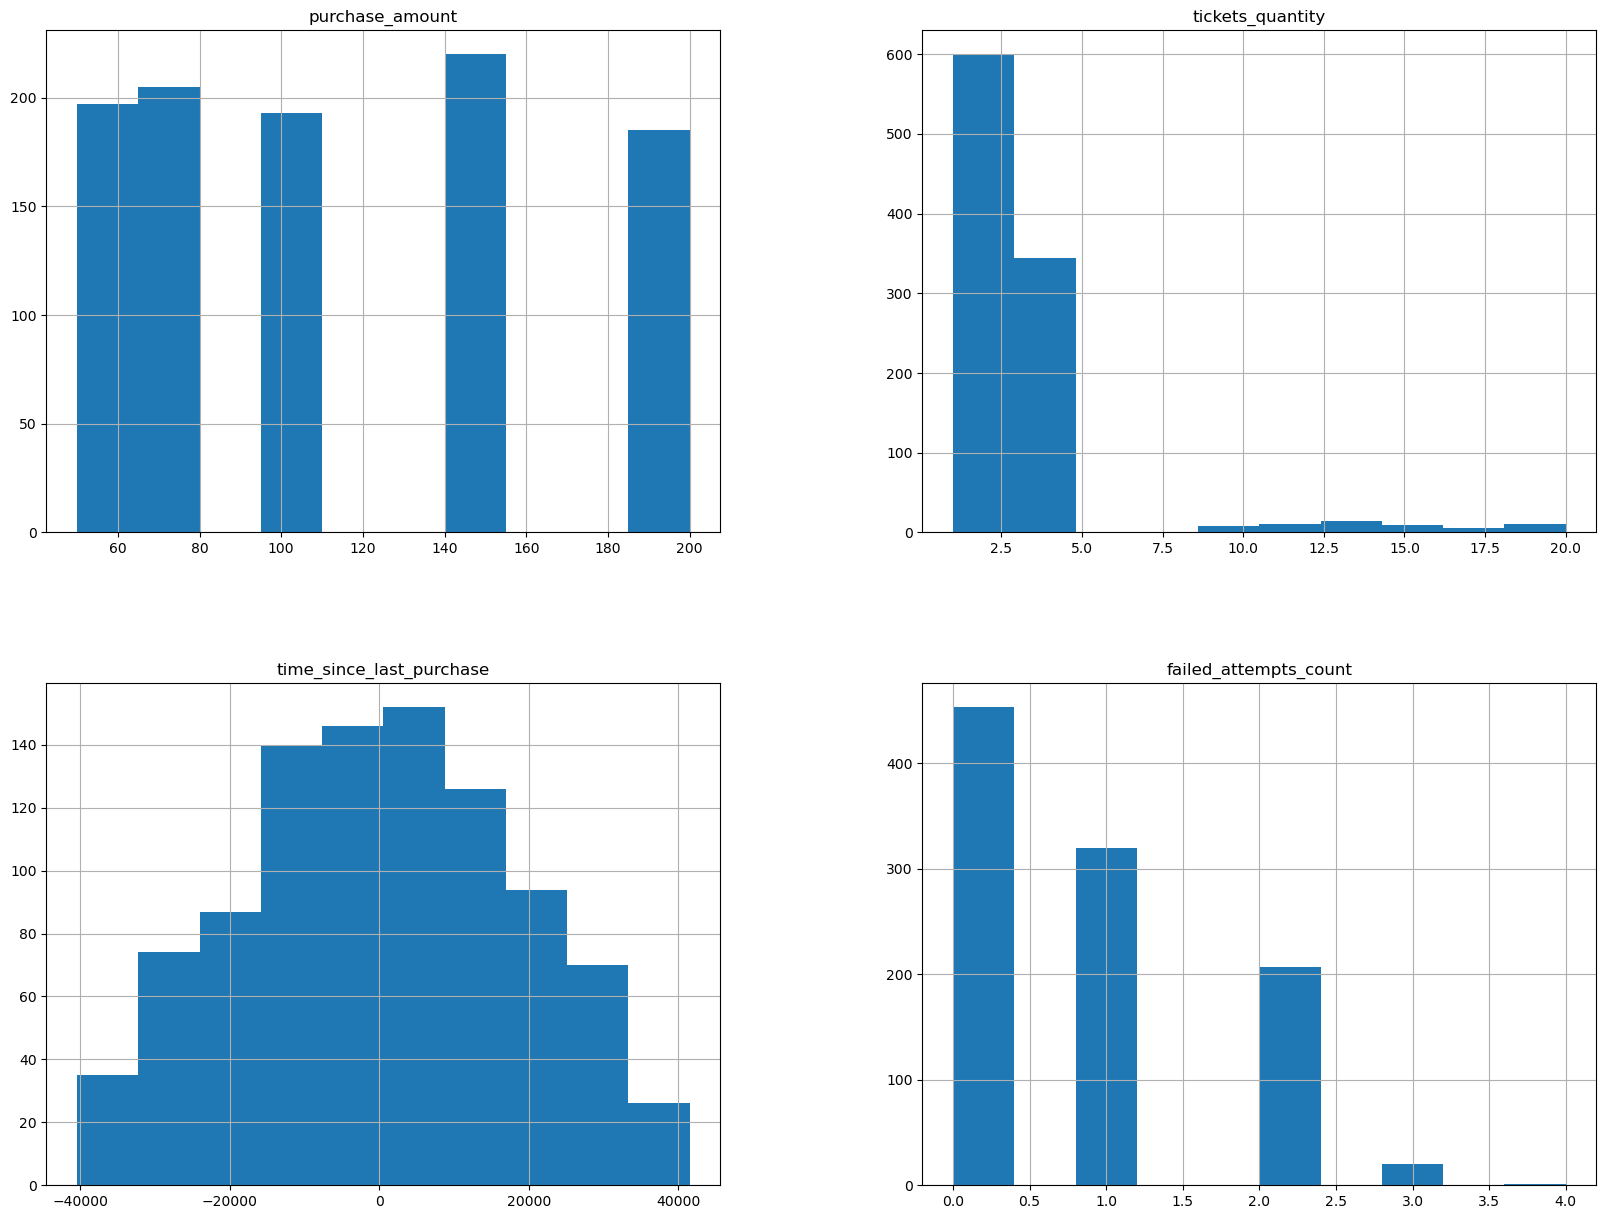

In [838]:
df.hist(figsize=(20,15))
plt.show()

In [840]:
print("Number of duplicates :", df.duplicated().sum())

Number of duplicates : 0


In [842]:
#calculating missing values and pourcentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

In [844]:
# Display only columns with missing data
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
# Sort by most missing values
missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)

print(missing_summary)

                          Missing Values  Percentage (%)
time_since_last_purchase              50             5.0


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1000 non-null   object 
 1   event_id                  1000 non-null   object 
 2   tier_id                   1000 non-null   object 
 3   purchase_timestamp        1000 non-null   object 
 4   purchase_amount           1000 non-null   float64
 5   tickets_quantity          1000 non-null   int64  
 6   payment_card_id           1000 non-null   object 
 7   ip_address                1000 non-null   object 
 8   purchase_success          1000 non-null   bool   
 9   location                  1000 non-null   object 
 10  time_since_last_purchase  950 non-null    float64
 11  failed_attempts_count     1000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 87.0+ KB


In [848]:
df['time_since_last_purchase'] = df['time_since_last_purchase'].fillna(1440)


In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1000 non-null   object 
 1   event_id                  1000 non-null   object 
 2   tier_id                   1000 non-null   object 
 3   purchase_timestamp        1000 non-null   object 
 4   purchase_amount           1000 non-null   float64
 5   tickets_quantity          1000 non-null   int64  
 6   payment_card_id           1000 non-null   object 
 7   ip_address                1000 non-null   object 
 8   purchase_success          1000 non-null   bool   
 9   location                  1000 non-null   object 
 10  time_since_last_purchase  1000 non-null   float64
 11  failed_attempts_count     1000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 87.0+ KB


In [852]:
# Drop ID-like columns
df = df.drop(columns=[
    'purchase_success',
    'user_id', 'event_id', 'tier_id',
    'payment_card_id', 'ip_address', 'location'
])


# Drop timestamp
df = df.drop(columns=['purchase_timestamp'])

# Define updated features
feature_cols = [
    'purchase_amount',
    'tickets_quantity',
    'time_since_last_purchase',
    'failed_attempts_count'
]

# Create feature matrix
X = df[feature_cols]

print(f"Cleaned feature matrix shape: {X.shape}")
print(X.head())


Cleaned feature matrix shape: (1000, 4)
   purchase_amount  tickets_quantity  time_since_last_purchase  \
0            100.0                 3                  -12371.0   
1             75.0                 2                    1440.0   
2            150.0                 1                   -4960.0   
3            150.0                 3                   -5442.0   
4             75.0                 3                  -12688.0   

   failed_attempts_count  
0                      1  
1                      0  
2                      2  
3                      2  
4                      0  


In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   purchase_amount           1000 non-null   float64
 1   tickets_quantity          1000 non-null   int64  
 2   time_since_last_purchase  1000 non-null   float64
 3   failed_attempts_count     1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [856]:
missing = X.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [858]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1 style="color:red">Using Isolation Forest and Optuna to Find the Best Hyperparameters</h1>

In [861]:
import optuna
import numpy as np
from sklearn.ensemble import IsolationForest

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    contamination = trial.suggest_float('contamination', 0.001, 0.5, log=True)

    model = IsolationForest(
        n_estimators=n_estimators,
        contamination=contamination,
        random_state=42
    )
    model.fit(X_train)

    scores = model.decision_function(X_train)  # anomaly scores (higher = normal, lower = anomaly)

    # We want to maximize the separation — e.g., the range of scores
    score_range = np.max(scores) - np.min(scores)
    return score_range

study_IsolationForest = optuna.create_study(direction='maximize')
study_IsolationForest.optimize(objective, n_trials=50)

best_params_isoforest = study_IsolationForest.best_params
print("Best hyperparameters:", best_params_isoforest)


[I 2025-07-25 19:25:48,984] A new study created in memory with name: no-name-9dd031cd-c74f-4e1a-87c5-75356e320dcd
[I 2025-07-25 19:25:49,091] Trial 0 finished with value: 0.20271027884307413 and parameters: {'n_estimators': 85, 'contamination': 0.009488757133644152}. Best is trial 0 with value: 0.20271027884307413.
[I 2025-07-25 19:25:49,418] Trial 1 finished with value: 0.2041587972366175 and parameters: {'n_estimators': 337, 'contamination': 0.13052422719615878}. Best is trial 1 with value: 0.2041587972366175.
[I 2025-07-25 19:25:49,798] Trial 2 finished with value: 0.20417398291974986 and parameters: {'n_estimators': 404, 'contamination': 0.2018627753924528}. Best is trial 2 with value: 0.20417398291974986.
[I 2025-07-25 19:25:50,222] Trial 3 finished with value: 0.20507031078283916 and parameters: {'n_estimators': 430, 'contamination': 0.10002781944603835}. Best is trial 3 with value: 0.20507031078283916.
[I 2025-07-25 19:25:50,732] Trial 4 finished with value: 0.20481735940485235 

Best hyperparameters: {'n_estimators': 57, 'contamination': 0.1007911541780433}


In [863]:
best_params = study.best_params

# Retrain the final model on your data
final_model = IsolationForest(**best_params_isoforest)
final_model.fit(X_scaled)  # Your full dataset

# Now you can use final_model for prediction:
y_scores = final_model.decision_function(X_scaled)
y_pred = final_model.predict(X_scaled)

 #Convert predictions to a readable form
# In IsolationForest: -1 = anomaly, 1 = normal
results_df = pd.DataFrame({
    'anomaly_score': y_scores,
    'prediction': y_pred
})

# Map prediction labels to text
results_df['label'] = results_df['prediction'].map({1: 'Normal', -1: 'Anomaly'})

# Count of normal vs anomaly
label_counts = results_df['label'].value_counts()
print(label_counts)

label
Normal     899
Anomaly    101
Name: count, dtype: int64


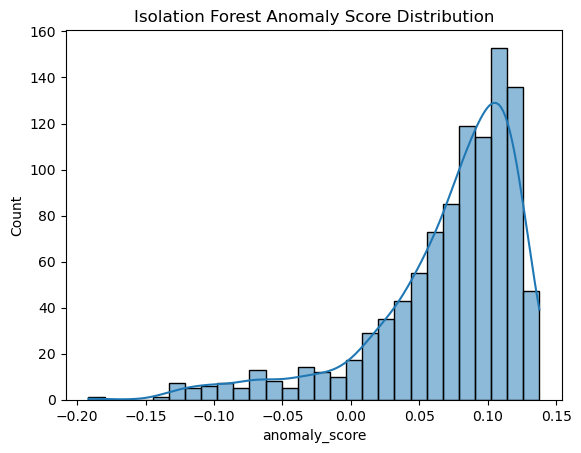

     anomaly_score  prediction    label
879      -0.191676          -1  Anomaly
238      -0.134909          -1  Anomaly
656      -0.131533          -1  Anomaly
700      -0.127028          -1  Anomaly
811      -0.127000          -1  Anomaly
480      -0.126335          -1  Anomaly
652      -0.122355          -1  Anomaly
618      -0.121972          -1  Anomaly
201      -0.121677          -1  Anomaly
477      -0.120074          -1  Anomaly


In [865]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of anomaly scores
sns.histplot(results_df['anomaly_score'], kde=True)
plt.title("Isolation Forest Anomaly Score Distribution")
plt.show()

# View top anomalies
print(results_df.sort_values('anomaly_score').head(10))


<h1>Evaluating the isolation forest by injecting anomalies</h1>

In [868]:
import numpy as np

X_synthetic = X_scaled.copy()

n_anomalies = 100
np.random.seed(42)
anomaly_indices = np.random.choice(len(X_synthetic), n_anomalies, replace=False)

# Inject bigger anomalies by shifting points even further away
X_synthetic[anomaly_indices] += np.random.normal(loc=15, scale=7, size=X_synthetic[anomaly_indices].shape)

y_pred_synthetic = final_model.predict(X_synthetic)

detected_anomalies = (y_pred_synthetic[anomaly_indices] == -1).sum()

print(f"Injected {n_anomalies} synthetic anomalies.")
print(f"Model detected {detected_anomalies} of them as anomalies.")
print(f"Detection rate: {detected_anomalies / n_anomalies:.2%}")


Injected 100 synthetic anomalies.
Model detected 100 of them as anomalies.
Detection rate: 100.00%


<h1 style="color:red">Using OneClassSVM and LocalOutlierFactor and evaluating both  </h1>


In [871]:
import optuna
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
import numpy as np

def objective(trial):
    nu = trial.suggest_float('nu', 0.01, 0.2)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = OneClassSVM(nu=nu, kernel='rbf', gamma=gamma)
    model.fit(X_train)

    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred == 1, 0, 1)

    score = f1_score(y_test, y_pred)
    return score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
best_params_ocsvm = study.best_params


[I 2025-07-25 19:30:36,239] A new study created in memory with name: no-name-ce8a299a-983a-4b97-af9d-51be47a14283
[I 2025-07-25 19:30:36,250] Trial 0 finished with value: 0.06060606060606061 and parameters: {'nu': 0.10735223822053704, 'gamma': 'scale'}. Best is trial 0 with value: 0.06060606060606061.
[I 2025-07-25 19:30:36,257] Trial 1 finished with value: 0.06666666666666667 and parameters: {'nu': 0.09164263537140122, 'gamma': 'auto'}. Best is trial 1 with value: 0.06666666666666667.
[I 2025-07-25 19:30:36,265] Trial 2 finished with value: 0.05333333333333334 and parameters: {'nu': 0.15082299152154843, 'gamma': 'auto'}. Best is trial 1 with value: 0.06666666666666667.
[I 2025-07-25 19:30:36,275] Trial 3 finished with value: 0.057971014492753624 and parameters: {'nu': 0.1232459775403565, 'gamma': 'scale'}. Best is trial 1 with value: 0.06666666666666667.
[I 2025-07-25 19:30:36,284] Trial 4 finished with value: 0.038461538461538464 and parameters: {'nu': 0.019079513938683484, 'gamma': 

Best parameters: {'nu': 0.08086786922419727, 'gamma': 'auto'}


In [873]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(**best_params_ocsvm)
ocsvm.fit(X_scaled)
y_pred_ocsvm = ocsvm.predict(X_scaled)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)

print(f"Detected anomalies: {np.sum(y_pred_ocsvm)} / {len(y_pred_ocsvm)}")


Detected anomalies: 79 / 1000


In [875]:
from sklearn.neighbors import LocalOutlierFactor

def objective_lof(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 50)
    contamination = trial.suggest_float('contamination', 0.01, 0.2)

    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        contamination=contamination,
        novelty=False  # default, used for fit_predict
    )

    y_pred = lof.fit_predict(X_scaled)
    # -1 = anomaly, 1 = normal → map to 1 = anomaly
    y_pred = (y_pred == -1).astype(int)

    # Aim for ~5% anomalies
    anomaly_ratio = y_pred.mean()
    return abs(anomaly_ratio - 0.05)  # closer to 5% is better

study_lof = optuna.create_study(direction='minimize')
study_lof.optimize(objective_lof, n_trials=50)

best_params_lof = study_lof.best_params
print("🔧 Best LOF parameters:", best_params_lof)


[I 2025-07-25 19:30:41,251] A new study created in memory with name: no-name-50faec15-564b-43a2-a786-426165df537d
[I 2025-07-25 19:30:41,265] Trial 0 finished with value: 0.012999999999999998 and parameters: {'n_neighbors': 45, 'contamination': 0.06243803288067032}. Best is trial 0 with value: 0.012999999999999998.
[I 2025-07-25 19:30:41,275] Trial 1 finished with value: 0.049 and parameters: {'n_neighbors': 32, 'contamination': 0.09896310038933563}. Best is trial 0 with value: 0.012999999999999998.
[I 2025-07-25 19:30:41,284] Trial 2 finished with value: 0.016 and parameters: {'n_neighbors': 21, 'contamination': 0.03383444920712077}. Best is trial 0 with value: 0.012999999999999998.
[I 2025-07-25 19:30:41,301] Trial 3 finished with value: 0.073 and parameters: {'n_neighbors': 44, 'contamination': 0.1230992490952889}. Best is trial 0 with value: 0.012999999999999998.
[I 2025-07-25 19:30:41,317] Trial 4 finished with value: 0.103 and parameters: {'n_neighbors': 9, 'contamination': 0.152

🔧 Best LOF parameters: {'n_neighbors': 29, 'contamination': 0.049969680390757394}


In [877]:
from sklearn.neighbors import LocalOutlierFactor

# Rebuild final model with best params
final_lof = LocalOutlierFactor(**best_params_lof)

# Use fit_predict directly on X_scaled
y_pred_lof = final_lof.fit_predict(X_scaled)
y_pred_lof = (y_pred_lof == -1).astype(int)

print(f"📊 Total anomalies detected: {np.sum(y_pred_lof)} / {len(y_pred_lof)}")



📊 Total anomalies detected: 50 / 1000


<h1>Evaluating all three models </h1>

In [880]:
import numpy as np

# Start with a fresh copy
X_synthetic = X_scaled.copy()

# Inject synthetic anomalies
n_anomalies = 100
np.random.seed(42)
anomaly_indices = np.random.choice(len(X_synthetic), n_anomalies, replace=False)
X_synthetic[anomaly_indices] += np.random.normal(loc=15, scale=7, size=X_synthetic[anomaly_indices].shape)

# === Isolation Forest (already done) ===
y_pred_isoforest = final_model.predict(X_synthetic)
detected_isoforest = (y_pred_isoforest[anomaly_indices] == -1).sum()

# === One-Class SVM ===
y_pred_ocsvm = ocsvm.predict(X_synthetic)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)  # 1=normal → 0, -1=anomaly → 1
detected_ocsvm = y_pred_ocsvm[anomaly_indices].sum()

# === Local Outlier Factor (re-fit each time) ===
lof_model = LocalOutlierFactor(**best_params_lof)
y_pred_lof = lof_model.fit_predict(X_synthetic)
y_pred_lof = (y_pred_lof == -1).astype(int)
detected_lof = y_pred_lof[anomaly_indices].sum()

# === Print results ===
print(f"\n[Isolation Forest] Detected {detected_isoforest}/{n_anomalies} synthetic anomalies ({detected_isoforest / n_anomalies:.2%})")
print(f"[One-Class SVM]    Detected {detected_ocsvm}/{n_anomalies} synthetic anomalies ({detected_ocsvm / n_anomalies:.2%})")
print(f"[LocalOutlierFactor] Detected {detected_lof}/{n_anomalies} synthetic anomalies ({detected_lof / n_anomalies:.2%})")




[Isolation Forest] Detected 100/100 synthetic anomalies (100.00%)
[One-Class SVM]    Detected 100/100 synthetic anomalies (100.00%)
[LocalOutlierFactor] Detected 9/100 synthetic anomalies (9.00%)


In [882]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Make a fresh copy of the original scaled dataset
X_synthetic_new = X_scaled.copy()

# Inject NEW synthetic anomalies
n_anomalies = 100
np.random.seed(123)  # New seed for a different batch
new_anomaly_indices = np.random.choice(len(X_synthetic_new), n_anomalies, replace=False)
X_synthetic_new[new_anomaly_indices] += np.random.normal(loc=1, scale=0.5, size=X_synthetic_new[new_anomaly_indices].shape)

# === Isolation Forest ===
y_pred_isoforest_new = final_model.predict(X_synthetic_new)
detected_isoforest_new = (y_pred_isoforest_new[new_anomaly_indices] == -1).sum()

# === One-Class SVM ===
y_pred_ocsvm_new = ocsvm.predict(X_synthetic_new)
y_pred_ocsvm_new = np.where(y_pred_ocsvm_new == 1, 0, 1)
detected_ocsvm_new = y_pred_ocsvm_new[new_anomaly_indices].sum()

# === LOF with novelty=True ===
lof_novelty = LocalOutlierFactor(novelty=True, **best_params_lof)
lof_novelty.fit(X_scaled)  # Fit on clean data
y_pred_lof_new = lof_novelty.predict(X_synthetic_new)
y_pred_lof_new = (y_pred_lof_new == -1).astype(int)
detected_lof_new = y_pred_lof_new[new_anomaly_indices].sum()

# === Results ===
print(f"\n🔁 NEW Anomaly Test Results:")
print(f"[Isolation Forest]     Detected {detected_isoforest_new}/{n_anomalies} ({detected_isoforest_new / n_anomalies:.2%})")
print(f"[One-Class SVM]        Detected {detected_ocsvm_new}/{n_anomalies} ({detected_ocsvm_new / n_anomalies:.2%})")
print(f"[LOF (novelty=True)]   Detected {detected_lof_new}/{n_anomalies} ({detected_lof_new / n_anomalies:.2%})")



🔁 NEW Anomaly Test Results:
[Isolation Forest]     Detected 53/100 (53.00%)
[One-Class SVM]        Detected 59/100 (59.00%)
[LOF (novelty=True)]   Detected 73/100 (73.00%)


In [884]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Make fresh subtle anomalies
X_synthetic_vis = X_scaled.copy()
n_anomalies = 100
np.random.seed(555)
subtle_indices = np.random.choice(len(X_scaled), n_anomalies, replace=False)
X_synthetic_vis[subtle_indices] += np.random.normal(loc=1, scale=0.5, size=X_synthetic_vis[subtle_indices].shape)


In [886]:
# Isolation Forest
y_isoforest = final_model.predict(X_synthetic_vis)
pred_isoforest = (y_isoforest == -1).astype(int)

# One-Class SVM
y_ocsvm = ocsvm.predict(X_synthetic_vis)
pred_ocsvm = np.where(y_ocsvm == 1, 0, 1)

# LOF (novelty=True)
lof_vis = LocalOutlierFactor(novelty=True, **best_params_lof)
lof_vis.fit(X_scaled)  # Fit only on normal data
y_lof = lof_vis.predict(X_synthetic_vis)
pred_lof = (y_lof == -1).astype(int)


In [888]:
pca = PCA(n_components=2)
X_vis_2D = pca.fit_transform(X_synthetic_vis)


In [890]:
def plot_model_preds(X_2D, true_anomaly_idx, model_pred, model_name):
    plt.figure(figsize=(6, 5))
    plt.title(f"{model_name} - Subtle Anomaly Detection")

    # Normal points
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c='lightgray', s=10, label='Normal')

    # True injected anomalies (ground truth)
    plt.scatter(X_2D[true_anomaly_idx, 0], X_2D[true_anomaly_idx, 1], 
                facecolors='none', edgecolors='blue', s=60, label='Injected Anomaly')

    # Anomalies detected by model
    detected_idx = np.where(model_pred == 1)[0]
    plt.scatter(X_2D[detected_idx, 0], X_2D[detected_idx, 1], 
                c='red', s=20, label='Detected Anomaly')

    plt.legend()
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.grid(True)
    plt.show()


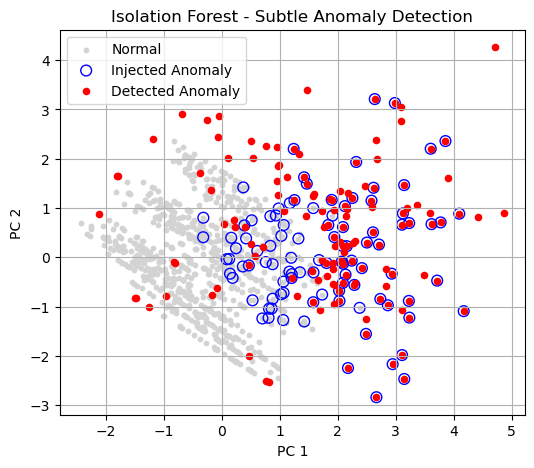

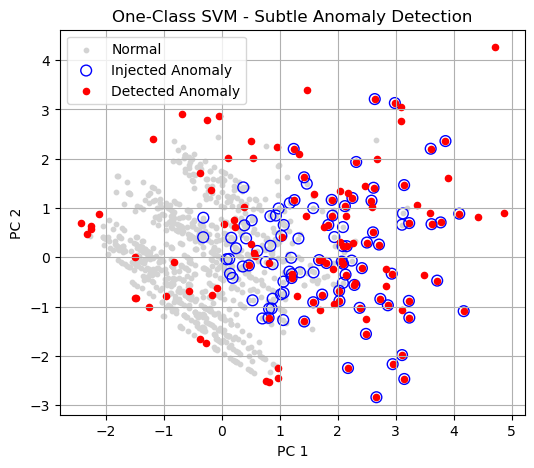

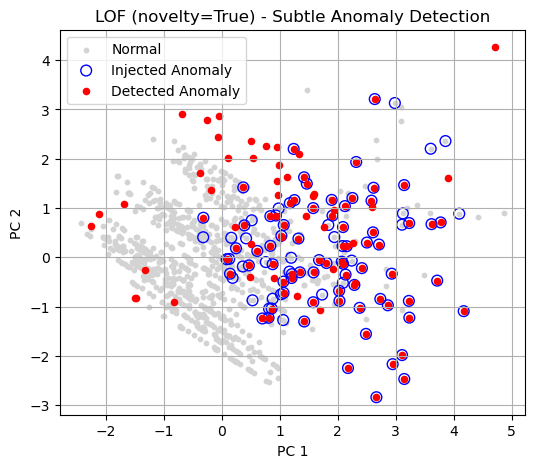

In [892]:
plot_model_preds(X_vis_2D, subtle_indices, pred_isoforest, "Isolation Forest")
plot_model_preds(X_vis_2D, subtle_indices, pred_ocsvm, "One-Class SVM")
plot_model_preds(X_vis_2D, subtle_indices, pred_lof, "LOF (novelty=True)")


In [894]:
print(f"Training data shape: {X_scaled.shape}")

Training data shape: (1000, 4)


In [896]:
import joblib

# Save One-Class SVM
joblib.dump(ocsvm, 'ocsvm_model.pkl')
joblib.dump(scaler, 'ocsvm_scaler.pkl')

['ocsvm_scaler.pkl']

In [898]:
# In your Jupyter/Colab notebook where you train the model
import numpy as np

# 1. Find median values (most normal points)
safe_values = np.median(X_scaled, axis=0)

# 2. Test prediction on median values
print("Prediction for median values:", ocsvm.predict([safe_values])[0])  # Should be 1

# 3. Save the median values for later testing
import joblib
joblib.dump(safe_values, 'safe_values.pkl')

# 4. Print feature names and their safe values
print("SAFE VALUES TO TEST IN API:")
for name, val in zip(X.columns, safe_values):
    print(f"{name}: {val:.2f}")

Prediction for median values: 1
SAFE VALUES TO TEST IN API:
purchase_amount: -0.27
tickets_quantity: -0.23
time_since_last_purchase: 0.07
failed_attempts_count: 0.24
